## Train a top2vec model

### Part I: default model (total nr of topics are used)
### Part II: hierarchically reduced model (100 topics)

In [1]:
import ndjson
import glob
import numpy as np
import pandas as pd
import top2vec
from top2vec import Top2Vec 

### Load primitives and filter events longer than 50 characters

In [2]:
with open('../../corpus/primitives_220331/primitives_annotated.ndjson') as f:
    data = ndjson.load(f)

In [3]:
# filter events longer than 50 characters
data_filtered = []
for item in data:
    if len(item['text']) > 50:
        data_filtered.append(item)

# prepare data for top2vec, create two lists of texts and document_ids
corpus = []
document_ids = []

for key in data_filtered:
    text = key['text']
    id = key['id']
    document_ids.append(id)
    corpus.append(text)

## Part I: default model

### Train, save and load a top2vec model

In [ ]:
# train model
model = Top2Vec(corpus, document_ids = document_ids)

In [ ]:
# model.get_num_topics()

In [ ]:
# save model
model.save('../../models/top2vec/top2vecmodel_50_reduced_50')

In [4]:
# load model
model = Top2Vec.load('../../models/top2vec/top2vecmodel_50_2')

In [5]:
model.get_num_topics(reduced=True)

100

### Show 5 topics most close to keyword

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["aardbeving"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

### Get topic distribution per document

The build matrix is too large, so this has to be done in multiple runs. The output-files are saved, and merged afterwards

In [ ]:
# a very unpretty way to get the topics per document in one file, part one
chunk_ids = document_ids[100000:113000]

topic_ids, topic_vals, words, word_scores = model.get_documents_topics(doc_ids = chunk_ids, num_topics=415)


representations = []
for doc_topic_ids, doc_topic_vals in zip(topic_ids, topic_vals):
    representations.append(
        doc_topic_vals[doc_topic_ids]
    )

merged_rep = [list(l) for l in zip(chunk_ids, representations)]
np.save('/work/62138/models/representations_5.npy', merged_rep)

In [ ]:
# merge files

merged_rep_1 = np.load('/work/62138/models/representations_1.npy', allow_pickle=True).tolist()
merged_rep_2 = np.load('/work/62138/models/representations_2.npy', allow_pickle=True).tolist()
merged_rep_3 = np.load('/work/62138/models/representations_3.npy', allow_pickle=True).tolist()
merged_rep_4 = np.load('/work/62138/models/representations_4.npy', allow_pickle=True).tolist()
merged_rep_5 = np.load('/work/62138/models/representations_5.npy', allow_pickle=True).tolist()

merged = merged_rep_1 + merged_rep_2 + merged_rep_3 + merged_rep_4 + merged_rep_5
np.save('/work/62138/models/representation_final_50.npy', merged)

## Part II: hierarchically reduced model (100 topics)

In [ ]:
# hierarchically reduce model to 100 topics

model.hierarchical_topic_reduction(50)

### Get topic distribution per document

The build matrix is too large, so this has to be done in multiple runs. The output-files are saved, and merged afterwards

In [ ]:
# topics per document distribution (reduced)
chunk_ids = document_ids[60000:120000]

topic_ids, topic_vals, words, word_scores = model.get_documents_topics(doc_ids = chunk_ids, reduced=True, num_topics=50)

representations = []
for doc_topic_ids, doc_topic_vals in zip(topic_ids, topic_vals):
    representations.append(
        doc_topic_vals[np.argsort(doc_topic_ids)]
    )

merged_rep = [list(l) for l in zip(chunk_ids, representations)]
np.save('/work/62138/models/representations_reduced_50_2.npy', merged_rep)

In [ ]:
# merge files

merged_rep_1 = np.load('/work/62138/models/representations_reduced_50_1.npy', allow_pickle=True).tolist()
merged_rep_2 = np.load('/work/62138/models/representations_reduced_50_2.npy', allow_pickle=True).tolist()


merged = merged_rep_1 + merged_rep_2
np.save('/work/62138/models/representation_final_50_reduced_50.npy', merged)

In [ ]:
merged[0]

### Explore topics

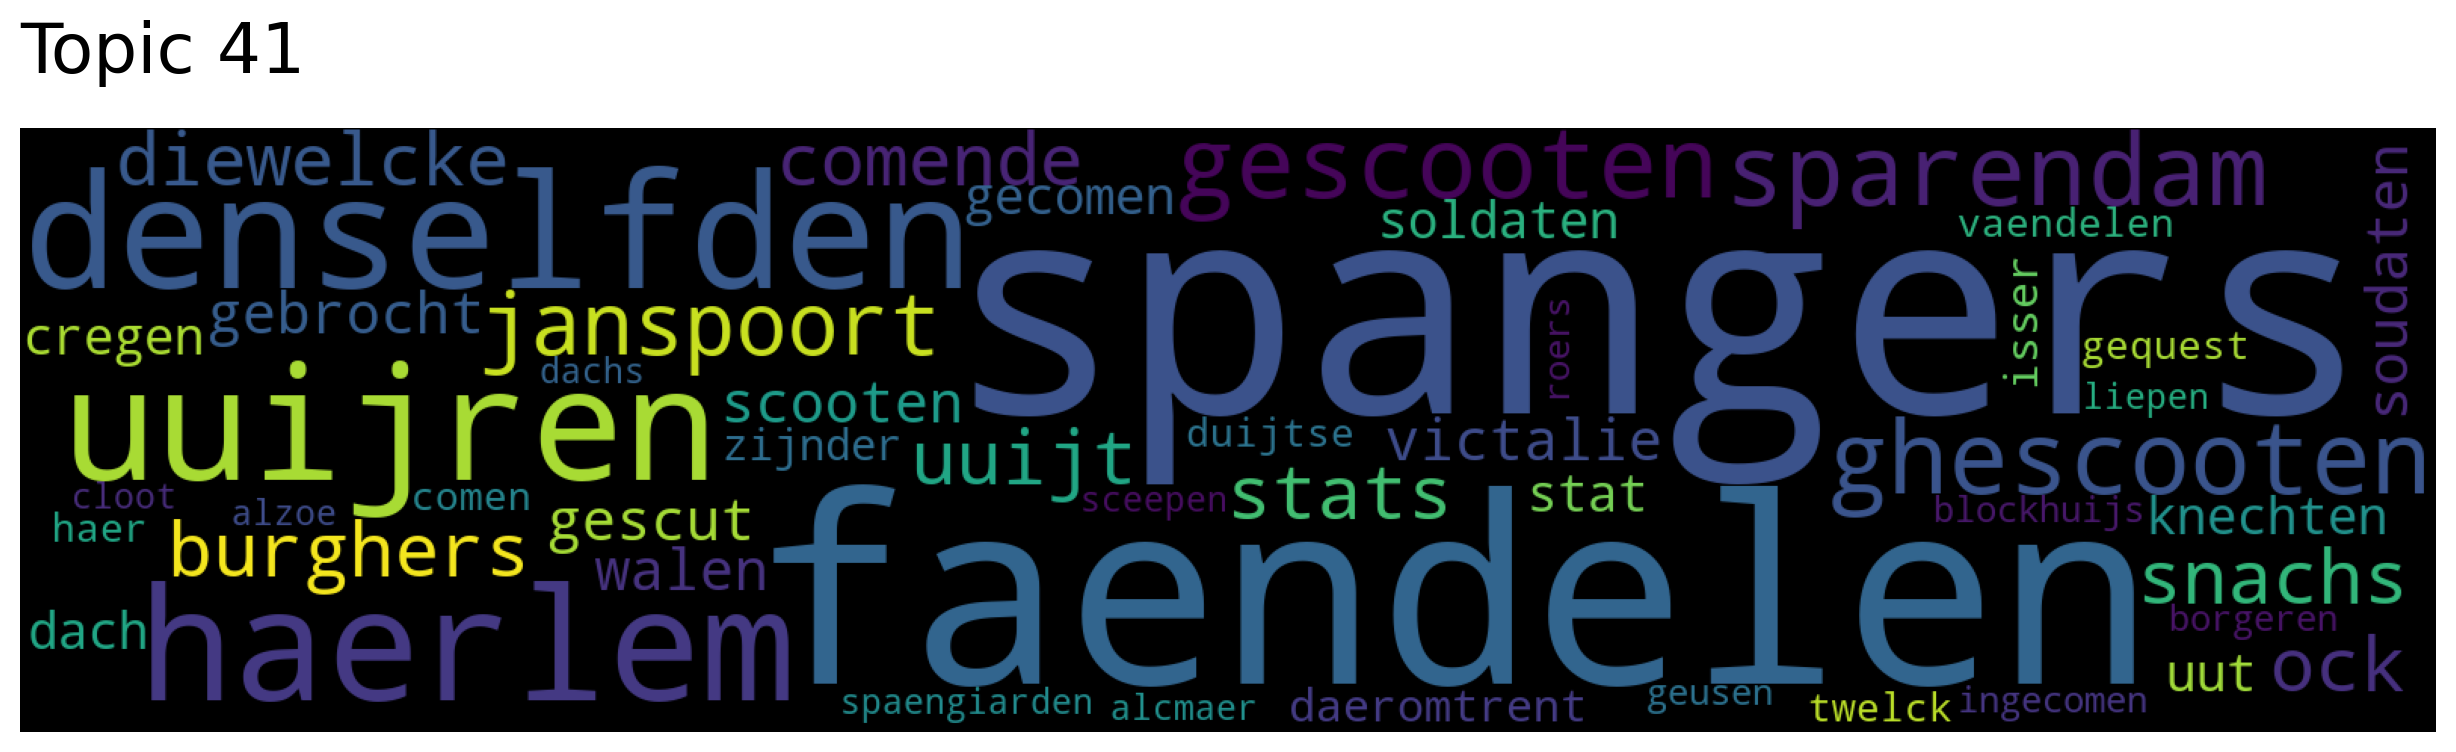

In [52]:
model.generate_topic_wordcloud(41, reduced=True)

In [ ]:
model.get_topics(reduced=True)

In [ ]:
model.search_documents_by_topic(1, num_docs=10, reduced=True)

In [ ]:
model.search_documents_by_keywords(['garnizoen', 'batterij'], num_docs=10)